In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits


# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers


# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42);

In [24]:
# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
# To track the splits so that analysis of errors can be done.
indices = np.arange(X_digits.shape[0]) 

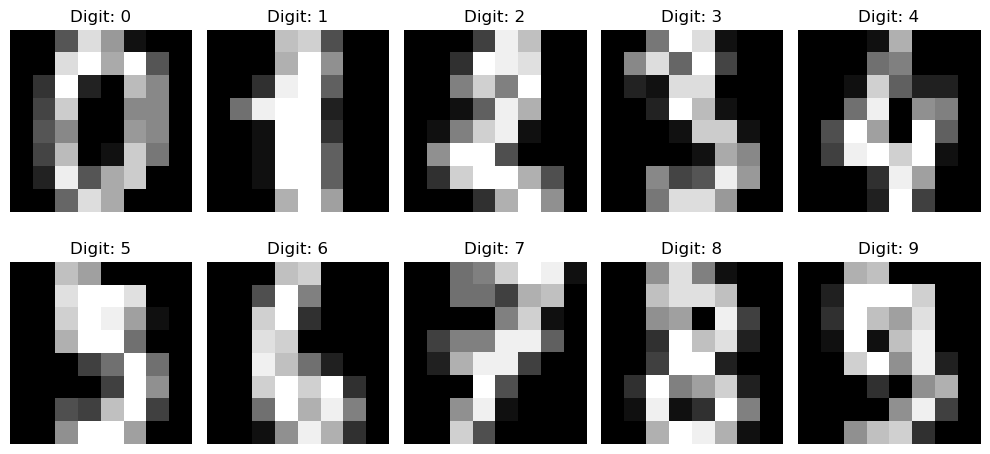

Digits dataset: 1797 samples, 64 features


In [4]:
# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()


# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

What does a single observation look like?

In [18]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Class Balance?

In [12]:
pd.Series(digits.target).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

Prepare & Split the Data

Load the digits dataset (or a similar image-based dataset).

Scale or normalize features as needed (e.g., pixels in the range [0,1]) and split into training and testing sets.

In [25]:
X_train, X_test, y_train, y_test,idx_train,idx_test = train_test_split(X_digits, y_digits,indices, test_size=0.2)

Build & Train an MLP:

Create a sequential model with hidden layers of reasonable size (e.g., 128, 64 units).

Use an activation function (relu, tanh, or sigmoid) and monitor validation accuracy to see which yields the best result.

In [ ]:
model = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1])),
    layers.Dense(128, activation='relu', input_shape=(64,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3292 - loss: 3.1021 - val_accuracy: 0.8611 - val_loss: 0.4138
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9091 - loss: 0.3308 - val_accuracy: 0.9583 - val_loss: 0.1866
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9625 - loss: 0.1653 - val_accuracy: 0.9722 - val_loss: 0.1351
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9741 - loss: 0.1112 - val_accuracy: 0.9750 - val_loss: 0.1124
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0784 - val_accuracy: 0.9778 - val_loss: 0.0970
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9879 - loss: 0.0553 - val_accuracy: 0.9750 - val_loss: 0.0897
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0398 - val_accuracy: 0.9778 - val_loss: 0.0882
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0305 - val_accuracy: 0.9750 - val_loss: 0.0854
Epo

Model Evaluation & Improvement:

Evaluate final accuracy or compute confusion matrices for classification.

Experiment with alternative hyperparameters, additional layers, or different optimizers to see how each change impacts performance.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


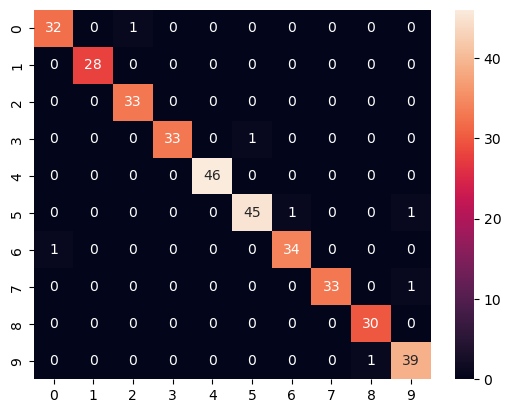

In [ ]:
predictions = model.predict(X_test).argmax(axis=1)

In [22]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
print(accuracy_score(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()